In [6]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
from matplotlib import font_manager, rc
font_path= 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 통합 데이터 불러오기

In [8]:
df = pd.read_csv('../data_2/full형매변환.csv') 
print(df.shape)

df_copy = df.copy()

# 일단 농가 결측치는 제거
df_copy.dropna(subset=['농가근내평균'], inplace=True)
print(df_copy.shape)

# 형매 결측치 0채우기
print(df_copy.isna().sum())
df_copy['형매_bi'].fillna('3마리미만', inplace=True) # 안 하고 하면 형매bi도 0 채워짐
df_copy.fillna(0, inplace=True)
print('=====')
print(f"결측치 총 개수:{df_copy.isna().sum(axis=1).sum()}")
print(df_copy.형매_bi.value_counts())

(99848, 19)
(76307, 19)
개월령              0
생시체중             0
근내평균             0
도체범위근내평균         0
체고               0
체장               0
형매도축수        55263
형매도체평균       55263
형매근내평균       55263
형매근내평균가산     55263
출산여부_6개월내        0
농가근내평균           0
농가근내평균가산         0
근내EPD            0
근내               0
점수               0
농가구분             0
TARGET1          0
형매_bi        55263
dtype: int64
=====
결측치 총 개수:0
3마리미만    65623
3마리이상    10684
Name: 형매_bi, dtype: int64


##### train_test_split 7:3

In [9]:
print(f"체고 0 인거:{df_copy[df_copy['체고']==0]}")

체고 0 인거:Empty DataFrame
Columns: [개월령, 생시체중, 근내평균, 도체범위근내평균, 체고, 체장, 형매도축수, 형매도체평균, 형매근내평균, 형매근내평균가산, 출산여부_6개월내, 농가근내평균, 농가근내평균가산, 근내EPD, 근내, 점수, 농가구분, TARGET1, 형매_bi]
Index: []


In [22]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(['TARGET1'],axis=1)
Y = df_copy.TARGET1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2023)

print(f'데이터 셋 70%:{df_copy.shape[0]*0.7}')
print(f'데이터 셋 30%:{df_copy.shape[0]*0.3}')

train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)

print(f'train set:{train.shape[0]}')
print(f'test set:{test.shape[0]}')

데이터 셋 70%:53414.899999999994
데이터 셋 30%:22892.1
train set:53414
test set:22893


In [23]:
model = sm.Logit.from_formula(""" TARGET1 ~ 개월령+ 생시체중+ 
근내평균+도체범위근내평균+체고+체장+C(형매_bi, Treatment("3마리이상"))+형매도체평균+
형매근내평균+형매근내평균가산+C(출산여부_6개월내, Treatment("Y"))
+농가근내평균+농가근내평균가산+근내EPD
+C(농가구분, Treatment("농가소")) """, train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.336539
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TARGET1   No. Observations:                53414
Model:                          Logit   Df Residuals:                    53398
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.1826
Time:                        22:33:57   Log-Likelihood:                -17976.
converged:                       True   LL-Null:                       -21991.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -5.8573      0.773     -7.578      0.000      -7.372      -4.342
C(형매_bi, Treatment("3마리이상"))[T.3마리미만]     0.0633      0.057      1.115      0.265      -0.048       0.174
C(출산여부_6개월내, Treatment("Y"))[T.N]         0.3615      0.033     10.840      0.000       0.296       0.427
C(농가구분, Treatment("농가소"))[T.우시장소]         0.2478      0.054      4.566      0.000       0.141       0.354
개월령                                      -0.0021      0.002     -1.077      0.281      -0.006       0.002
생시체중                                      0.0008      0.000      3.637      0.000       0.000       0.001
근내평균                                      0.1267      0.038      3.293      0.001       0.051       0.202
도체범위근내평균                                  0.7682      0.029     26.334      0.000       0.711       0.825
체고                                       -0.0188      0.008     -2.457      0.014      -0.034      -0.004
체장                                        0.0065      0.004      1.641      0.101      -0.001       0.014
형매도체평균                                   -0.0016      0.001     -2.670      0.008      -0.003      -0.000
형매근내평균                                    0.0822      0.047      1.734      0.083      -0.011       0.175
형매근내평균가산                                  0.1901      0.050      3.815      0.000       0.092       0.288
농가근내평균                                    0.0310      0.021      1.494      0.135      -0.010       0.072
농가근내평균가산                                  0.4763      0.025     18.827      0.000       0.427       0.526
근내EPD                                     0.6585      0.070      9.385      0.000       0.521       0.796
=========================================================================================================
"""

In [24]:
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

,OR,Lower CI,Upper CI
Intercept,0.002859,0.000628,0.013005
"C(형매_bi, Treatment(""3마리이상""))[T.3마리미만]",1.065319,0.953191,1.190637
"C(출산여부_6개월내, Treatment(""Y""))[T.N]",1.435480,1.344658,1.532436
"C(농가구분, Treatment(""농가소""))[T.우시장소]",1.281213,1.151918,1.425020
개월령,0.997924,0.994159,1.001704
생시체중,1.000831,1.000383,1.001280
근내평균,1.135052,1.052611,1.223950
도체범위근내평균,2.155893,2.036088,2.282747
체고,0.981336,0.966696,0.996197
체장,1.006480,0.998744,1.014275


In [25]:
model = sm.Logit.from_formula(""" TARGET1 ~ 생시체중+ 
근내평균+도체범위근내평균+체고+형매도체평균+
형매근내평균가산+C(출산여부_6개월내, Treatment("Y"))
+농가근내평균가산+근내EPD
+C(농가구분, Treatment("농가소")) """, train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.336642
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TARGET1   No. Observations:                53414
Model:                          Logit   Df Residuals:                    53403
Method:                           MLE   Df Model:                           10
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.1823
Time:                        22:33:58   Log-Likelihood:                -17981.
converged:                       True   LL-Null:                       -21991.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -6.0549      0.737     -8.212      0.000      -7.500      -4.610
C(출산여부_6개월내, Treatment("Y"))[T.N]     0.3856      0.029     13.398      0.000       0.329       0.442
C(농가구분, Treatment("농가소"))[T.우시장소]     0.2350      0.054      4.368      0.000       0.130       0.340
생시체중                                  0.0008      0.000      3.559      0.000       0.000       0.001
근내평균                                  0.1443      0.037      3.873      0.000       0.071       0.217
도체범위근내평균                              0.7695      0.029     26.382      0.000       0.712       0.827
체고                                   -0.0095      0.006     -1.669      0.095      -0.021       0.002
형매도체평균                               -0.0007   7.81e-05     -8.658      0.000      -0.001      -0.001
형매근내평균가산                              0.2700      0.023     11.744      0.000       0.225       0.315
농가근내평균가산                              0.5086      0.014     35.336      0.000       0.480       0.537
근내EPD                                 0.6370      0.068      9.382      0.000       0.504       0.770
=====================================================================================================
"""

In [26]:
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

,OR,Lower CI,Upper CI
Intercept,0.002346,0.000553,0.009955
"C(출산여부_6개월내, Treatment(""Y""))[T.N]",1.470509,1.389855,1.555843
"C(농가구분, Treatment(""농가소""))[T.우시장소]",1.264940,1.138342,1.405618
생시체중,1.000810,1.000364,1.001256
근내평균,1.155260,1.073899,1.242785
도체범위근내평균,2.158681,2.038735,2.285685
체고,0.990587,0.979644,1.001653
형매도체평균,0.999324,0.999171,0.999477
형매근내평균가산,1.309971,1.252252,1.370351
농가근내평균가산,1.662879,1.616628,1.710452


#### 유의한 변수만 고르기

In [27]:
model = sm.Logit.from_formula(""" TARGET1 ~ 생시체중+ 근내평균 +도체범위근내평균 + 형매도체평균
                              + 형매근내평균가산 + C(출산여부_6개월내, Treatment("Y"))
                              + 농가근내평균가산 + 근내EPD
                              + C(농가구분, Treatment("농가소")) """, train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.336668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TARGET1   No. Observations:                53414
Model:                          Logit   Df Residuals:                    53404
Method:                           MLE   Df Model:                            9
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.1823
Time:                        22:33:58   Log-Likelihood:                -17983.
converged:                       True   LL-Null:                       -21991.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.2467      0.184    -39.327      0.000      -7.608      -6.886
C(출산여부_6개월내, Treatment("Y"))[T.N]     0.3824      0.029     13.317      0.000       0.326       0.439
C(농가구분, Treatment("농가소"))[T.우시장소]     0.2360      0.054      4.386      0.000       0.131       0.341
생시체중                                  0.0007      0.000      3.292      0.001       0.000       0.001
근내평균                                  0.1392      0.037      3.750      0.000       0.066       0.212
도체범위근내평균                              0.7756      0.029     26.804      0.000       0.719       0.832
형매도체평균                               -0.0007   7.81e-05     -8.743      0.000      -0.001      -0.001
형매근내평균가산                              0.2703      0.023     11.758      0.000       0.225       0.315
농가근내평균가산                              0.5088      0.014     35.354      0.000       0.481       0.537
근내EPD                                 0.6303      0.068      9.303      0.000       0.497       0.763
=====================================================================================================
"""

In [28]:
train_copy = train.copy()

pred_y_1 = model.predict(train)

train_copy['probability_tr'] = pred_y_1

print(len(train_copy))
train_copy.head()

53414


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,출산여부_6개월내,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,형매_bi,TARGET1,probability_tr
74658,51,632.14,2.50,2.40,131.1,152.9,0.0,0.00,0.0,0.00,Y,4.44,-0.50,-0.03,3,2,농가소,3마리미만,0,0.007789
47151,38,748.21,5.00,5.58,132.7,158.0,0.0,0.00,0.0,0.00,Y,5.67,-0.68,0.29,7,5,농가소,3마리미만,1,0.137305
65363,50,737.50,4.19,5.67,129.2,137.1,6.0,377.17,5.0,0.04,Y,5.31,1.13,-0.04,7,4,농가소,3마리이상,0,0.194304
73951,50,867.86,5.12,6.00,129.9,146.7,0.0,0.00,0.0,0.00,Y,5.84,0.48,0.42,8,5,농가소,3마리미만,1,0.323983
64019,54,671.43,4.51,4.72,128.1,147.4,0.0,0.00,0.0,0.00,Y,4.73,-0.57,0.06,3,2,농가소,3마리미만,0,0.061901


In [29]:
# train set 만들기
test_copy = test.copy()

pred_y = model.predict(test_copy)

test_copy['probability'] = pred_y

print(len(test_copy))
test_copy.head()

22893


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,출산여부_6개월내,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,형매_bi,TARGET1,probability
24682,58,692.86,4.16,4.54,131.3,154.1,0.0,0.0,0.0,0.00,N,4.67,0.28,0.08,6,4,농가소,3마리미만,0,0.112703
99156,48,695.00,5.22,5.33,128.6,149.9,0.0,0.0,0.0,0.00,N,5.67,0.49,0.34,8,5,우시장소,3마리미만,1,0.311105
29604,33,650.00,4.93,5.14,125.8,143.9,0.0,0.0,0.0,0.00,N,4.43,-0.62,0.23,6,4,농가소,3마리미만,0,0.131731
4970,44,825.00,4.89,5.82,134.9,157.6,0.0,0.0,0.0,0.00,Y,4.42,0.06,0.49,7,5,농가소,3마리미만,1,0.248218
98627,30,524.00,4.78,3.80,125.8,143.9,3.0,458.0,4.0,-1.81,Y,6.00,1.52,0.06,4,3,우시장소,3마리이상,0,0.047206


In [40]:
from performance import performance

In [41]:
train_copy['prob_5'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
train_copy['prob_6'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
train_copy['prob_7'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
train_copy['prob_8'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
train_copy['prob_9'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

train_copy['prob_85'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


In [42]:
test_copy['prob_5'] = test_copy['probability'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
test_copy['prob_6'] = test_copy['probability'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
test_copy['prob_7'] = test_copy['probability'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
test_copy['prob_8'] = test_copy['probability'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
test_copy['prob_9'] = test_copy['probability'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

test_copy['prob_85'] = test_copy['probability'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)

In [43]:
print(len(test_copy[test_copy['prob_5'].isnull()==False]))
print(len(test_copy[test_copy['prob_6'].isnull()==False]))
print(len(test_copy[test_copy['prob_7'].isnull()==False]))
print(len(test_copy[test_copy['prob_8'].isnull()==False]))
print(len(test_copy[test_copy['prob_9'].isnull()==False]))

22893
22893
22893
22893
22893


In [44]:
print(f"5이상개수:{len(test_copy[test_copy['점수']==5])}")
print(f"TARGET1개수:{len(test_copy[test_copy['TARGET1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(test_copy[test_copy['probability']>=0.5])}")
print(f"prob_5개수:{len(test_copy[test_copy['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(test_copy[test_copy['probability']>=0.6])}")
print(f"prob_6개수:{len(test_copy[test_copy['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(test_copy[test_copy['probability']>=0.7])}")
print(f"prob_7개수:{len(test_copy[test_copy['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(test_copy[test_copy['probability']>=0.8])}")
print(f"prob_8개수:{len(test_copy[test_copy['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(test_copy[test_copy['probability']>=0.9])}")
print(f"prob_9개수:{len(test_copy[test_copy['prob_9']==1])}")

5이상개수:3321
TARGET1개수:3321
0.5이상개수:844
prob_5개수:844
0.6이상개수:400
prob_6개수:400
0.7이상개수:141
prob_7개수:141
0.8이상개수:39
prob_8개수:39
0.9이상개수:7
prob_9개수:7


In [53]:
test_copy.to_excel('../result/result_5.xlsx')

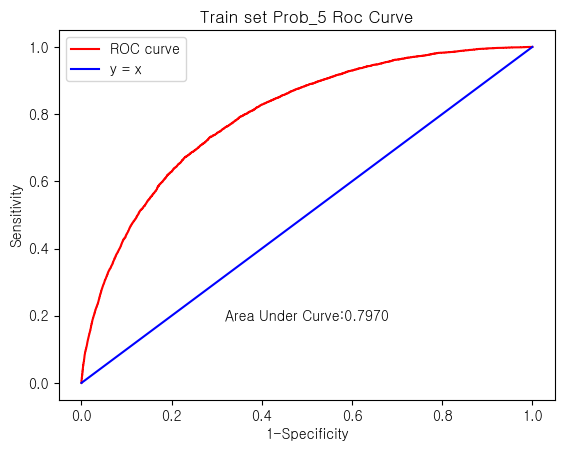

In [45]:
# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(train_copy['TARGET1'], train_copy['probability_tr'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(train_copy['TARGET1'], train_copy['probability_tr'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Train set Prob_5 Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

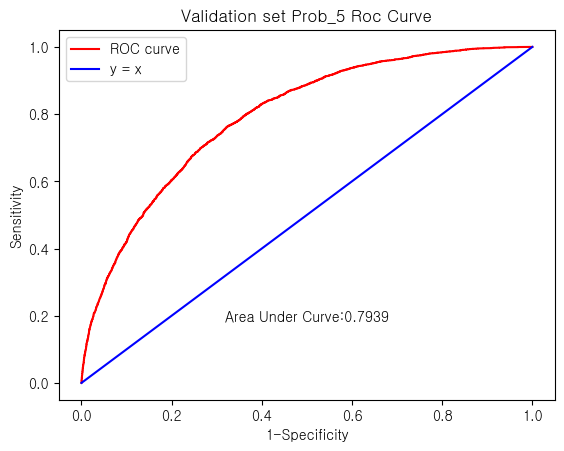

In [46]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['probability'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['probability'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Validation set Prob_5 Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

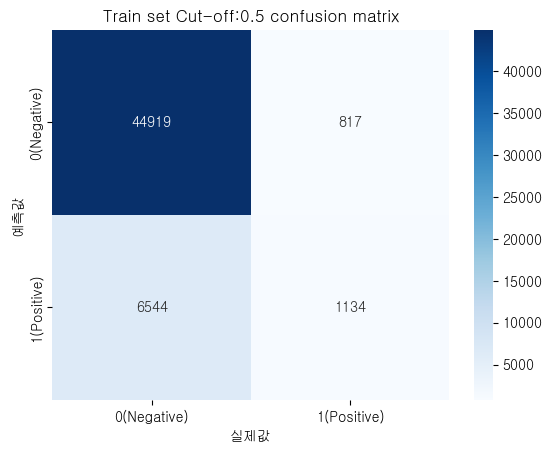

True Positive:1134
True Negative:44919
False Positive:817
False Negative:6544


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,14.769471,13.975852,15.563090
1,Specificity,98.213661,98.092268,98.335054
2,Accuracy,86.218969,85.926641,86.511297
3,PPV,58.124039,55.934827,60.313250
4,NPV,87.284068,86.996229,87.571907
5,F_0.5_score,36.623175,NaN,NaN


In [47]:
# cut-off 0.5 train set
cm = confusion_matrix(train_copy['TARGET1'],train_copy['prob_5'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Train set Cut-off:0.5 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==1)])}")
print(f"True Negative:{len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==0)])}")
print(f"False Positive:{len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==0)])}")
print(f"False Negative:{len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==1)])}")

performance(TP=len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==1)]),
            TN=len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==0)]),
            FP=len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==0)]),
            FN=len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==1)]),
            BETA=0.5)

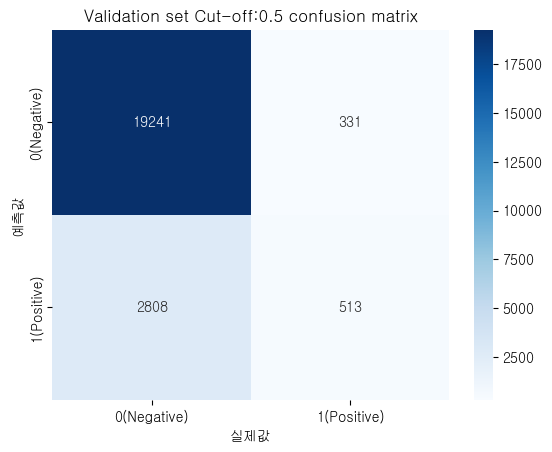

True Positive:513
True Negative:19241
False Positive:331
False Negative:2808


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,15.447154,14.217990,16.676319
1,Specificity,98.308809,98.128161,98.489456
2,Accuracy,86.288385,85.842806,86.733965
3,PPV,60.781991,57.488055,64.075926
4,NPV,87.264729,86.824696,87.704761
5,F_0.5_score,38.300732,NaN,NaN


In [48]:
# cut-off 0.5 validation set
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_5'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Validation set Cut-off:0.5 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)

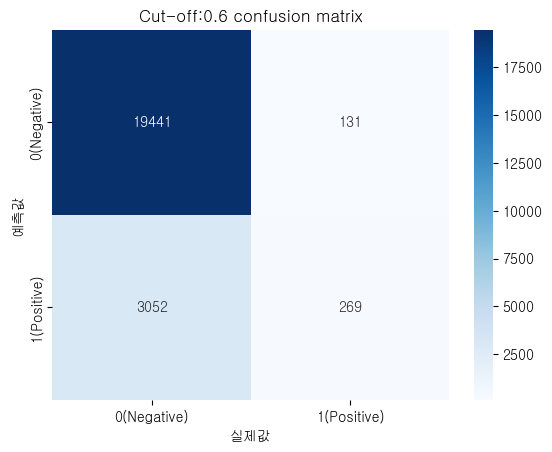

True Positive:269
True Negative:19441
False Positive:131
False Negative:3052


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,8.099970,7.172027,9.027913
1,Specificity,99.330676,99.216442,99.444911
2,Accuracy,86.096187,85.647995,86.544378
3,PPV,67.250000,62.650847,71.849153
4,NPV,86.431334,85.983789,86.878879
5,F_0.5_score,27.331843,NaN,NaN


In [49]:
# cut-off 0.6
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_6'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.6 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)

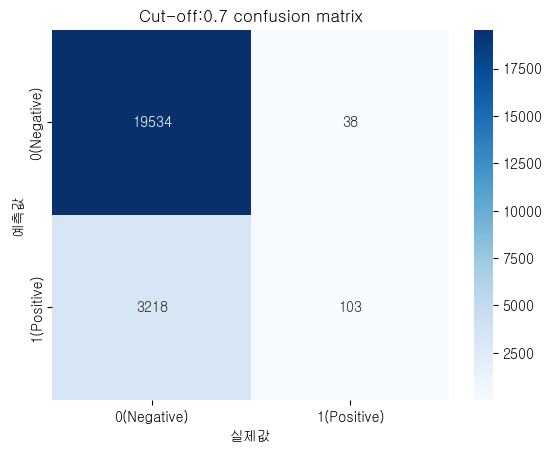

True Positive:103
True Negative:19534
False Positive:38
False Negative:3218


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,3.101475,2.511866,3.691085
1,Specificity,99.805845,99.744173,99.867517
2,Accuracy,85.777312,85.324850,86.229773
3,PPV,73.049645,65.725823,80.373468
4,NPV,85.856188,85.403379,86.308998
5,F_0.5_score,13.256113,NaN,NaN


In [50]:
# cut-off 0.7
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_7'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.7 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)

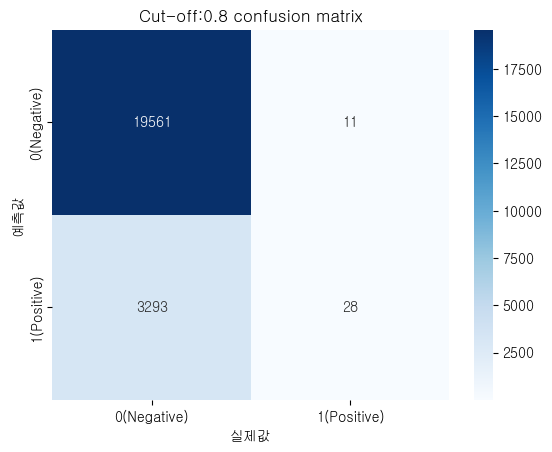

True Positive:28
True Negative:19561
False Positive:11
False Negative:3293


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.843120,0.532143,1.154096
1,Specificity,99.943797,99.910593,99.977002
2,Accuracy,85.567641,85.112414,86.022868
3,PPV,71.794872,57.671626,85.918118
4,NPV,85.591144,85.135837,86.046451
5,F_0.5_score,4.026460,NaN,NaN


In [51]:
# cut-off 0.8
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_8'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.8 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)

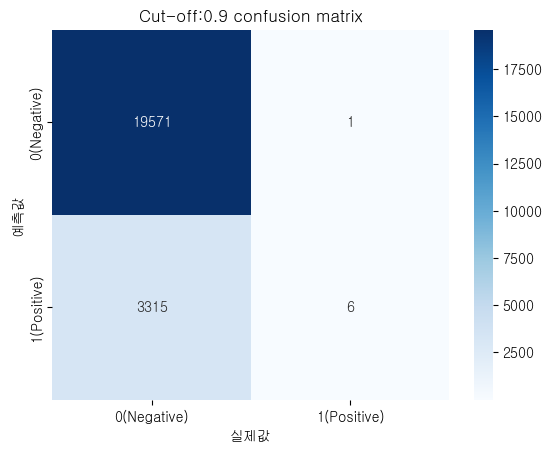

True Positive:6
True Negative:19571
False Positive:1
False Negative:3315


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.180668,0.036234,0.325103
1,Specificity,99.994891,99.984877,100.004905
2,Accuracy,85.515223,85.059310,85.971136
3,PPV,85.714286,59.791323,111.637249
4,NPV,85.515162,85.059178,85.971146
5,F_0.5_score,0.895790,NaN,NaN


In [52]:
# cut-off 0.9
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_9'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.9 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)

##### 0.85

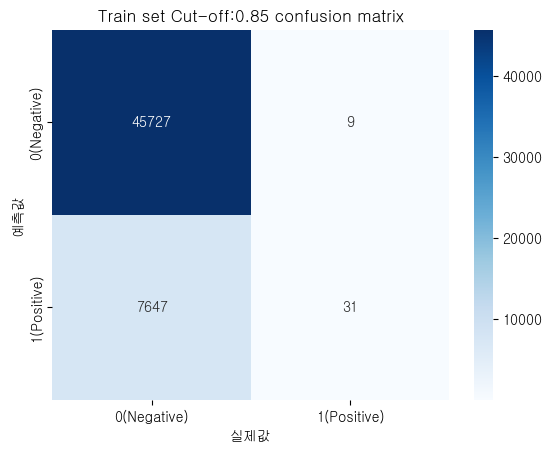

True Positive:31
True Negative:45727
False Positive:9
False Negative:7647


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.403751,0.261907,0.545595
1,Specificity,99.980322,99.967467,99.993177
2,Accuracy,85.666679,85.369507,85.963851
3,PPV,77.500000,64.558990,90.441010
4,NPV,85.672799,85.375569,85.970030
5,F_0.5_score,1.977545,NaN,NaN


In [40]:
# cut-off 0.85 train
cm = confusion_matrix(train_copy['TARGET1'], train_copy['prob_85'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Train set Cut-off:0.85 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==1)])}")
print(f"True Negative:{len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==0)])}")
print(f"False Positive:{len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==0)])}")
print(f"False Negative:{len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==1)])}")

performance(TP=len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==1)]),
            TN=len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==0)]),
            FP=len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==0)]),
            FN=len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==1)]),
            BETA=0.5)

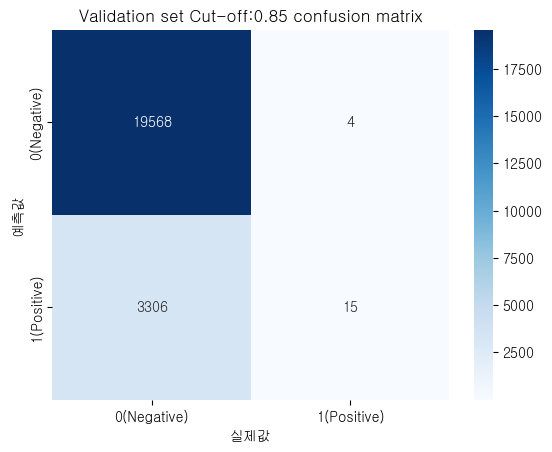

True Positive:15
True Negative:19568
False Positive:4
False Negative:3306


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.451671,0.223611,0.679732
1,Specificity,99.979563,99.959536,99.999589
2,Accuracy,85.541432,85.085861,85.997002
3,PPV,78.947368,60.615729,97.279007
4,NPV,85.546909,85.091221,86.002597
5,F_0.5_score,2.207830,NaN,NaN


In [41]:
# cut-off 0.85 validation
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_85'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Validation set Cut-off:0.85 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)